In [188]:
#import modules
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
import matplotlib
matplotlib.style.use('ggplot')

In [524]:
#read files
df2012 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2012.txt", delimiter="|")
df2013 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2013.txt", delimiter="|")
df2014 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2014.txt", delimiter="|")
df2015 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2015.txt", delimiter="|")
df2016 = pd.read_csv("C:\Users\pliu\Desktop\starr\StarrBOP_SDB_Data_Extract_2016.txt", delimiter="|")

C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (58,104,113,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (25,104,113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (58,113,120) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [526]:
#union dataframes
frames = [df2012, df2013, df2014, df2015, df2016]
df_all = pd.concat(frames)

In [3]:
#loss data
loss = pd.read_excel("C:\Users\pliu\Desktop\starr\Starr_Loss_Data.xlsx")

In [529]:
#zip code cleaning in premium dataset
df_all["Zip_Code"] = df_all["Risk_Location_Postal_Zip_Code"].str[:5].astype(int)

In [812]:
[x for x in df_all.columns]

['Bordereau_Date',
 'Carrier_Name',
 'Policy_Number',
 'Policy_Effective_Date',
 'Policy_Expiration_Date',
 'Policy_Bound_Date',
 'Policy_Cancelled_Date',
 'Occurrence_Indicator',
 'Policy_Type',
 'ISO_Policy_Type_Code',
 'Transaction_Level',
 'Policy_Insured_Type_Code',
 'Policy_Transaction_Type_Code',
 'Endorsement_Sequence_Number',
 'Billing_Broker_Commission_Amt',
 'Commission_Amt',
 'Managing_Broker_Commission_Amt',
 'Written_Premium_Amt',
 'Premium_Transaction_Eff_Date',
 'Premium_Transaction_Exp_Date',
 'ISO_Reporting_Module',
 'ASL_Number',
 'ISO_SubLine_Code',
 'ISO_Class_Code',
 'Coverage_Code',
 'ISO_Coverage_Code',
 'Named_Insured_Type_Code',
 'Named_Insured_Company_Name',
 'Named_Insured_Company_Name_DBA',
 'Named_Insured_Co_Name_Legal',
 'Named_Insured_LastName',
 'Named_Insured_FirstName',
 'Named_Insured_Address_1',
 'Named_Insured_Address_2',
 'Named_Insured_City_Name',
 'Named_Insured_County_Name',
 'Named_Insured_State_Code',
 'Named_Insured_Province_Code',
 'Named_I

## Premium Aggregation

In [530]:
df_all.groupby(["Policy_Number", "Zip_Code", 'ISO_Coverage_Code']).size().reset_index().groupby("Policy_Number").size()

Policy_Number
1000050003121    12
1000050003131    12
1000050003141    12
1000050003151    12
1000050004121     9
1000050004131    11
1000050004141    16
1000050006121    10
1000050007121     8
1000050007131     9
1000050007141     9
1000050008121     9
1000050008131     9
1000050009121     9
1000050010121     8
1000050011121     8
1000050011131     9
1000050011141     9
1000050012121    10
1000050012131    10
1000050012141    10
1000050012151    10
1000050014121     8
1000050014131     9
1000050014141     9
1000050014151     8
1000050015121     8
1000050015131     8
1000050015141     8
1000050016121     8
                 ..
1000373616161    11
1000373617161    11
1000373618161    12
1000373619161    12
1000373620161     9
1000373621161     9
1000373622161    37
1000373623161    10
1000373624161    17
1000373625161     9
1000373627161    10
1000373628161     9
1000373629161    11
1000373630161    12
1000373631161     9
1000373633161     9
1000373635161    10
1000373636161    11
100037

In [534]:
f = {'Written_Premium_Amt': 'sum' }

In [557]:
df_premium = df_all.groupby(["Policy_Number", "Zip_Code", 'ISO_Coverage_Code'], as_index=False).aggregate(f)

In [558]:
df_premium.sort_values("Written_Premium_Amt")

,Policy_Number,Zip_Code,ISO_Coverage_Code,Written_Premium_Amt
337418,1000356745151,33172,22,-19560.0
288525,1000354116151,33173,21,-14538.0
118851,1000054534141,29464,21,-14343.0
281896,1000353739141,11803,23,-9927.0
337419,1000356745151,33172,23,-9400.0
79077,1000052945131,10011,22,-7641.0
279737,1000353638141,33016,21,-6725.0
675,1000050031121,10001,23,-6156.0
79078,1000052945131,10011,23,-6088.0
116840,1000054446141,11209,23,-6084.0


In [568]:
#Loss data aggregation
df_loss = loss.groupby(["Policy_Number", "Loss_Zip_Code", "ISO_Coverage_Code"], as_index=False)["Total Loss"].sum()

In [569]:
#sort by total loss
df_loss.sort_values("Total Loss")

,Policy_Number,Loss_Zip_Code,ISO_Coverage_Code,Total Loss
1647,1000364400151,10014,23,0.00
1300,1000357405161,33410,19,0.00
1332,1000357789151,7501,7,0.00
1440,1000359747151,92545,23,0.00
1610,1000363435151,77040,23,0.00
1501,1000361084161,77802,32,0.00
1704,1000365934151,77078,4,0.00
1696,1000365705151,10128,23,0.00
894,1000351365151,11214,16,0.00
884,1000351231161,32159,11,0.00


In [642]:
#loss ratio = loss/premium
df_loss_ratio = pd.merge(df_premium, df_loss, how="left", left_on=["Policy_Number", "Zip_Code", 'ISO_Coverage_Code'],\
         right_on=["Policy_Number", "Loss_Zip_Code", "ISO_Coverage_Code"]).sort_values("Total Loss")

In [643]:
# Remove non-positive written premium records and impute NAN total loss with 0
df_loss_ratio = df_loss_ratio[df_loss_ratio["Written_Premium_Amt"] >0].fillna(0)

In [647]:
df_loss_ratio["Loss_Ratio"] = df_loss_ratio["Total Loss"]/df_loss_ratio["Written_Premium_Amt"]

## Evaluation: 

1(good) for loss ratio<=0.65; 0(bad) for loss ratio>0.65

In [648]:
df_loss_ratio["Evaluation"] = 1

In [650]:
df_loss_ratio.loc[df_loss_ratio["Loss_Ratio"] >0.65, "Evaluation"] = 0

# PLUTO in NYC

In [908]:
#PLUTO in Bronx
BX = pd.read_csv("C:\Users\pliu\Desktop\starr\BX.csv")
BK = pd.read_csv("C:\Users\pliu\Desktop\starr\BK.csv")
QN = pd.read_csv("C:\Users\pliu\Desktop\starr\QN.csv")
SI = pd.read_csv("C:\Users\pliu\Desktop\starr\SI.csv")
MN = pd.read_csv("C:\Users\pliu\Desktop\starr\MN.csv")

C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (18,19,21,22,24,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (18,19,21,22,65,66,78,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Columns (18,19,21,22,23,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2705: DtypeWarning: Colum

In [909]:
frame = [BK,QN,SI,MN,BX]

In [910]:
Pluto_NYC = pd.concat(frame) 

In [919]:
Pluto_NYC.YearBuilt.groupby(Pluto_NYC["YearBuilt"]).size()

YearBuilt
0       43610
1661        1
1665        1
1706        1
1729        1
1765        1
1779        1
1780        1
1785        2
1798        1
1799        1
1800      170
1801        1
1802        1
1804        1
1805        1
1812        1
1814        1
1816        1
1821        2
1822        3
1823        1
1824        5
1825        3
1826        5
1827        3
1829       20
1830       11
1831        6
1832        5
        ...  
1988     3597
1989     3612
1990     3509
1991     2264
1992     3173
1993     2460
1994     2130
1995     2560
1996     3479
1997     3164
1998     2763
1999     3727
2000     4192
2001     4544
2002     4190
2003     4450
2004     6538
2005     6016
2006     4849
2007     4108
2008     2922
2009     1817
2010     1199
2011     1412
2012     1572
2013     1389
2014     1582
2015     1451
2016       34
2040        1
dtype: int64

In [90]:
# Remove null zipcode
Pluto_NYC = Pluto_NYC[pd.notnull(Pluto_NYC["ZipCode"])]

In [66]:
#inspect correlations within pluto variables
Pluto_NYC.corr()

,AreaSource,AssessLand,AssessTot,BBL,BldgArea,BldgDepth,BldgFront,Block,BoroCode,BuiltFAR,...,RetailArea,SanitBoro,SanitDistrict,StrgeArea,Tract2010,UnitsRes,UnitsTotal,YearAlter1,YearAlter2,YearBuilt
AreaSource,1.000000,0.001630,-0.003662,-0.436641,0.001568,-0.066949,-0.012490,-0.102091,-0.436428,-0.007366,...,-0.002123,-0.005793,-0.035792,0.002137,-0.059675,0.011286,0.009303,-0.039710,-0.024553,-0.301991
AssessLand,0.001630,1.000000,0.882612,-0.023190,0.220266,0.035384,0.040761,-0.008798,-0.023057,0.010251,...,0.048694,-0.026979,0.017563,0.029491,-0.000172,0.036970,0.041964,0.014740,0.008863,-0.010656
AssessTot,-0.003662,0.882612,1.000000,-0.055365,0.380266,0.099166,0.110426,-0.026835,-0.054836,0.031075,...,0.125959,-0.061457,0.005588,0.056231,-0.004688,0.105340,0.114321,0.036534,0.024593,0.000756
BBL,-0.436641,-0.023190,-0.055365,1.000000,-0.071574,-0.202991,-0.092125,0.237316,0.999384,-0.072123,...,-0.050018,0.985468,-0.289110,-0.019605,0.149022,-0.085528,-0.088454,-0.216801,-0.082483,0.014752
BldgArea,0.001568,0.220266,0.380266,-0.071574,1.000000,0.163239,0.195350,-0.038944,-0.070737,0.124549,...,0.163081,-0.080210,-0.006977,0.084338,-0.004075,0.320613,0.313856,0.052535,0.032299,0.018446
BldgDepth,-0.066949,0.035384,0.099166,-0.202991,0.163239,1.000000,0.490372,-0.133923,-0.199769,0.055877,...,0.126815,-0.223639,-0.017272,0.114729,-0.038137,0.127108,0.132471,0.185975,0.098753,0.297281
BldgFront,-0.012490,0.040761,0.110426,-0.092125,0.195350,0.490372,1.000000,-0.068883,-0.090369,0.043067,...,0.137577,-0.083543,-0.033244,0.111273,0.008877,0.184818,0.186479,0.158515,0.089919,0.176375
Block,-0.102091,-0.008798,-0.026835,0.237316,-0.038944,-0.133923,-0.068883,1.000000,0.203080,-0.046489,...,-0.029645,0.171127,0.649617,-0.018945,0.192492,-0.045907,-0.048951,-0.117603,-0.037194,0.013839
BoroCode,-0.436428,-0.023057,-0.054836,0.999384,-0.070737,-0.199769,-0.090369,0.203080,1.000000,-0.071017,...,-0.049345,0.986277,-0.318024,-0.019077,0.143254,-0.084550,-0.087390,-0.214277,-0.081796,0.014370
BuiltFAR,-0.007366,0.010251,0.031075,-0.072123,0.124549,0.055877,0.043067,-0.046489,-0.071017,1.000000,...,0.031346,-0.080515,-0.015731,0.009251,-0.014734,0.037748,0.039882,0.041313,0.017724,0.028320


## Aggregation by ZIP CODE on some PLUTO columns 

In [92]:
#Column selection
columns = ["ZipCode","OwnerType", "LotArea", "BldgArea", "ComArea", "ResArea", "OfficeArea", "RetailArea", "GarageArea", "StrgeArea", \
          "FactryArea", "OtherArea", "NumBldgs", "NumFloors", "UnitsRes", "UnitsTotal", "LotFront", "LotDepth", "BldgFront",\
          "ProxCode", "IrrLotCode", "LotType", "AssessLand", "AssessTot", "YearBuilt", "YearAlter1", "YearAlter2", "BuiltFAR", \
          "ResidFAR", "CommFAR", "FacilFAR"]

In [93]:
Pluto_NYC= Pluto_NYC[columns]

In [104]:
# Categorical columns transformation
Pluto_NYC["IrrLotCode_binary"] = 0
Pluto_NYC["IrrLotCode_binary"][Pluto_NYC["IrrLotCode"] == "Y"] = 1

C:\Users\pliu\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [116]:
Pluto_by_zc = Pluto_NYC.groupby(["ZipCode"])

In [128]:
means = Pluto_by_zc.mean()

In [133]:
means.to_csv("Pluto_means.csv")

## for fuzzy match
 No longer needed

In [ ]:
# #Transformation
# starr_address = []
# for string in address:
#     string = string[:-2] + string[-2:].replace("ST", "STREET")  
#     string = string[:-3] + string[-3:].replace("AVE", "AVENUE")
#     string = string[:-2] + string[-2:].replace("DR", "DRIVE")  
#     string = string[:-2] + string[-2:].replace("RD", "ROAD")
#     string = string[:-4] + string[-4:].replace("BLVD", "BOULEVARD")
#     string = string[:-3] + string[-3:].replace("HWY", "HIGHWAY")
#     string = string[:-2] + string[-2:].replace("PL", "PLACE")
#     string = string[:-4] + string[-4:].replace("PKWY", "PARKWAY")  
#     string = string[:-2] + string[-2:].replace("LN", "LANE")  
#     string = string[:-3] + string[-3:].replace("FWY", "FREEWAY")  
#     string = string[:-4] + string[-4:].replace("GTWY", "GATEWAY")
#     string = string.replace(" E ", " EAST ")
#     string = string.replace(" S ", " SOUTH ")
#     string = string.replace(" W ", " WEST ")
#     string = string.replace(" N ", " NORTH ")
#     #print string
#     starr_address.append(string)

## Correlation between Loss Ratio and PLUTO Statistics

In [31]:
pluto_means = pd.read_csv("Pluto_means.csv")

In [32]:
pluto_means.columns

Index([u'ZipCode', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'NumBldgs', u'NumFloors', u'UnitsRes',
       u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront', u'AssessLand',
       u'AssessTot', u'YearBuilt', u'YearAlter1', u'YearAlter2', u'BuiltFAR',
       u'ResidFAR', u'CommFAR', u'FacilFAR', u'IrrLotCode_binary'],
      dtype='object')

In [703]:
pluto_means

,ZipCode,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,...,AssessLand,AssessTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary
0,10001,1.440512e+04,8.885735e+04,6.064154e+04,19048.495630,32582.519920,7651.701652,2775.558795,6397.090379,1296.438290,...,2.381273e+06,9.739983e+06,1743.492711,871.704568,124.777454,6.299563,5.676093,8.140914,9.140914,0.275024
1,10002,1.134819e+04,2.671986e+04,7.158699e+03,18902.371860,762.915353,1918.509632,398.293053,541.595447,68.995330,...,5.557298e+05,1.977798e+06,1791.299475,944.598365,193.154699,3.657881,4.238809,3.217747,5.611500,0.336252
2,10003,5.189300e+03,2.925995e+04,1.217978e+04,15199.671820,6003.323388,2653.876399,347.122003,454.584976,49.545019,...,7.219523e+05,3.402787e+06,1880.581247,1106.804475,197.688865,4.387485,4.299435,1.790623,5.154704,0.274374
3,10004,1.284229e+05,2.918174e+05,2.661042e+05,22944.104350,207101.147800,6097.478261,1905.713043,881.426087,0.000000,...,8.971303e+06,2.873206e+07,1745.234783,932.452174,243.973913,9.921565,8.972174,13.166957,13.443478,0.921739
4,10005,2.983925e+04,3.360883e+05,2.519634e+05,76093.324680,210966.051900,8966.792208,1735.740260,5000.142857,0.000000,...,8.875206e+06,3.418482e+07,1858.441558,1011.688312,130.363636,13.657273,9.740260,14.059740,14.519481,0.922078
5,10006,1.664262e+04,1.671002e+05,1.106387e+05,42037.227270,92736.818180,6062.121212,147.378788,408.424242,0.000000,...,5.879169e+06,1.964605e+07,1673.424242,784.242424,121.530303,10.531818,10.000000,15.000000,15.000000,0.939394
6,10007,1.893475e+04,1.725346e+05,1.446233e+05,24586.127120,100737.275400,7397.661017,953.957627,1395.559322,0.000000,...,3.503421e+06,1.986351e+07,1783.500000,834.550847,254.961864,7.626017,8.036610,8.288136,8.974576,0.648305
7,10009,8.807928e+03,2.319759e+04,3.060148e+03,20042.704510,170.132331,851.349624,544.495489,124.627068,6.911278,...,4.487409e+05,1.853102e+06,1724.958647,1037.955639,165.915789,3.225203,4.006271,0.096992,4.061805,0.151128
8,10010,1.071011e+04,7.241468e+04,3.805360e+04,31816.551450,21979.070740,4492.430868,1531.488746,3654.377814,0.000000,...,2.006362e+06,8.535970e+06,1870.567524,1108.623794,190.078778,6.247588,6.522637,5.108360,7.984084,0.231511
9,10011,6.464105e+03,2.757947e+04,1.162457e+04,15232.754550,6197.107383,2166.801055,704.241611,636.775647,81.978907,...,6.411829e+05,3.289963e+06,1872.829818,1082.949185,213.414669,3.900920,4.563245,2.595590,5.542905,0.216683


In [807]:
#loss ratio
sorted([x for x in df_loss_ratio.Loss_Ratio if x!=0])

[0.0019354838709677419,
 0.01069995541685243,
 0.02181818181818182,
 0.025078369905956112,
 0.02823529411764706,
 0.034732272069464547,
 0.035661218424962851,
 0.045540796963946868,
 0.045627376425855515,
 0.063086507373235554,
 0.063492063492063489,
 0.065573770491803282,
 0.074303405572755415,
 0.07792207792207792,
 0.086500513596799486,
 0.094117647058823528,
 0.095659688254092476,
 0.097895252080274109,
 0.11143131604226705,
 0.11374407582938388,
 0.13567251461988303,
 0.13953488372093023,
 0.14569295210344199,
 0.1492955118036764,
 0.1492955118036764,
 0.15384615384615385,
 0.1554907677356657,
 0.16815075585007247,
 0.20156210632401109,
 0.20454545454545456,
 0.21133271694624223,
 0.23006091514378807,
 0.23999999999999999,
 0.24769824769824769,
 0.25190010857763301,
 0.25798129635601419,
 0.26061339790153348,
 0.26688907422852376,
 0.2682763246143528,
 0.27906976744186046,
 0.28025923979681205,
 0.28778070784177656,
 0.29006526468455401,
 0.29734250139379298,
 0.3058103975535168,


In [656]:
#merge loss ratio with pluto data
pd.merge(df_loss_ratio, pluto_means, how = "inner", left_on="Zip_Code", right_on="ZipCode")

,Policy_Number,Zip_Code,ISO_Coverage_Code,Written_Premium_Amt,Loss_Zip_Code,Total Loss,Evaluation,Loss_Ratio,ZipCode,LotArea,...,AssessLand,AssessTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary
0,1000364400151,10014,23,164.0,10014.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
1,1000356269151,10014,19,24.0,10014.0,834.0,0,34.75,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
2,1000050037131,10014,13,4.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
3,1000050037131,10014,14,2.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
4,1000050037141,10014,7,61.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
5,1000050037141,10014,13,113.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
6,1000050037141,10014,14,64.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
7,1000050037141,10014,19,33.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
8,1000050037141,10014,22,140.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453
9,1000050037141,10014,23,164.0,0.0,0.0,1,0.00,10014,6.565601e+03,...,4.976772e+05,2.194764e+06,1864.781809,985.605519,209.203883,3.163199,2.797905,1.318140,5.466786,0.509453


In [657]:
loss_and_pluto = pd.merge(df_loss_ratio, pluto_means, how="inner", left_on="Zip_Code", right_on="ZipCode")

## Crime Data

In [118]:
path = "C:\Users\pliu\Desktop\starr\Crime_data\\"

In [120]:
crime_bronx = pd.read_csv(path +"2015_bronx_sample.csv")

In [121]:
crime_brooklyn = pd.read_csv(path + "2015_brooklyn_sample.csv")

In [122]:
crime_manhattan = pd.read_csv(path + "2015_manhattan_sample.csv")

In [123]:
crime_queens = pd.read_csv(path + "2015_queens_sample.csv")

In [124]:
crime_si = pd.read_csv(path + "2015_si_sample.csv")

In [125]:
frames = [crime_bronx, crime_brooklyn, crime_manhattan, crime_queens, crime_si]

In [155]:
crime_nyc = pd.concat(frames)

In [162]:
crime_nyc = crime_nyc.rename()

,Unnamed: 0,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,...,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1,location,longitude,latitude,zipcode
0,1,967949,c9857eb9,04/14/2015 02:30:00 PM,Tuesday,Apr,14,2015,14,4,...,43,BRONX,N.Y. POLICE DEPT,1021989,245392,"(40.8401471930001, -73.86361076)","40.8401471930001, -73.86361076",-73.863611,40.840147,10462
1,2,951642,11d5eaf1,01/13/2015 09:15:00 PM,Tuesday,Jan,13,2015,21,1,...,43,BRONX,N.Y. POLICE DEPT,1026012,241961,"(40.8307119930001, -73.849092819)","40.8307119930001, -73.849092819",-73.849093,40.830712,10462
2,3,1108015,c4d94a0d,03/03/2015 12:00:00 AM,Tuesday,Mar,3,2015,0,3,...,46,BRONX,N.Y. POLICE DEPT,1009448,249206,"(40.8506601870001, -73.908920209)","40.8506601870001, -73.908920209",-73.908920,40.850660,10453
3,4,736463,4a1ee10e,08/18/2015 02:20:00 AM,Tuesday,Aug,18,2015,2,8,...,47,BRONX,N.Y. POLICE DEPT,1023503,258756,"(40.876820722, -73.858060837)","40.876820722, -73.858060837",-73.858061,40.876821,10469
4,5,1087986,15c0cc83,04/10/2015 01:00:00 PM,Friday,Apr,10,2015,13,4,...,43,BRONX,N.Y. POLICE DEPT,1020219,239110,"(40.8229123080001, -73.870041304)","40.8229123080001, -73.870041304",-73.870041,40.822912,10473
5,6,1031747,89a26f07,12/04/2015 12:05:00 AM,Friday,Dec,4,2015,0,12,...,42,BRONX,N.Y. POLICE DEPT,1011628,240275,"(40.826140706, -73.9010767949999)","40.826140706, -73.9010767949999",-73.901077,40.826141,10456
6,7,1023984,b5a103a4,08/23/2015 05:00:00 AM,Sunday,Aug,23,2015,5,8,...,44,BRONX,N.Y. POLICE DEPT,1005993,245176,"(40.839608205, -73.921421787)","40.839608205, -73.921421787",-73.921422,40.839608,10452
7,8,981177,99e95cde,07/31/2015 08:30:00 PM,Friday,Jul,31,2015,20,8,...,47,BRONX,N.Y. POLICE DEPT,1024846,257597,"(40.873633553, -73.853211519)","40.873633553, -73.853211519",-73.853212,40.873634,10469
8,9,1054692,57446d65,12/28/2015 07:00:00 PM,Monday,Dec,28,2015,19,12,...,43,BRONX,N.Y. POLICE DEPT,1021687,236876,"(40.8167745150001, -73.8647497219999)","40.8167745150001, -73.8647497219999",-73.864750,40.816775,10473
9,10,1019947,5c472ade,12/07/2015 11:00:00 AM,Monday,Dec,7,2015,11,12,...,41,BRONX,N.Y. POLICE DEPT,1014992,235461,"(40.8129165730001, -73.888943752)","40.8129165730001, -73.888943752",-73.888944,40.812917,10474


In [234]:
loss_and_crime = pd.merge(loss_by_zip, crime_count, left_on="Zip_Code", right_on="zipcode", how="left")

In [206]:
crime_count = crime_nyc.groupby("zipcode").size()

crime_count = pd.DataFrame(crime_count, columns=["count"])

crime_count["zipcode"] = crime_count.index

## Merge loss ratio and pluto and crime data

In [684]:
loss_and_pluto_and_crime = pd.merge(loss_and_pluto, crime_count, how = "inner", left_on="Zip_Code", right_on="zipcode")

In [907]:
loss_and_pluto_and_crime.to_csv("model_data.csv")

In [861]:
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

In [862]:
train, test = train_test_split(loss_and_pluto_and_crime, train_size = 0.8)

In [863]:
train_cols = train.columns[9:-1]

In [709]:
X_selected = ["NumFloors", "UnitsRes", "UnitsTotal", "YearBuilt", "ResidFAR", "FacilFAR", "count" ]

In [698]:
loss_and_pluto_and_crime[X_selected]

,NumFloors,UnitsRes,UnitsTotal,YearBuilt,ResidFAR,FacilFAR,IrrLotCode_binary,count
0,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
1,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
2,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
3,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
4,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
5,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
6,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
7,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
8,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75
9,4.119954,11.649463,12.722534,1864.781809,2.797905,5.466786,0.509453,75


In [864]:
logit = sm.Logit(train['Evaluation'], train[X_selected].astype(float))

In [865]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.026064
         Iterations 10


In [866]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Evaluation   No. Observations:                52611
Model:                          Logit   Df Residuals:                    52604
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Nov 2016   Pseudo R-squ.:                0.002756
Time:                        19:24:35   Log-Likelihood:                -1371.3
converged:                       True   LL-Null:                       -1375.0
                                        LLR p-value:                    0.2707
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
NumFloors     -0.3193      0.090     -3.560      0.000        -0.495    -0.143
UnitsRes      -0.0895      0.035     -2.526      0.012        -0.159    -0.020
UnitsTotal     0.1021      0.038      2.709      0.007         0.028     0.176
YearBuilt      0.0035      0.000     27.868      0.000         0.003     0.004
ResidFAR       0.1342      0.114      1.180      0.238        -0.089     0.357
FacilFAR       0.0417      0.095      0.440      0.660        -0.144     0.228
count         -0.0074      0.002     -3.125      0.002        -0.012    -0.003
==============================================================================
"""

In [883]:
result.params

NumFloors    -0.319264
UnitsRes     -0.089462
UnitsTotal    0.102142
YearBuilt     0.003457
ResidFAR      0.134216
FacilFAR      0.041725
count        -0.007360
dtype: float64

In [884]:
Y_trained = result.predict(train[X_selected].astype(float))

In [896]:
a = np.exp(Y_trained)/(np.exp(Y_trained)+1)

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.30000000e+01,   7.96900000e+03,   4.46190000e+04,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

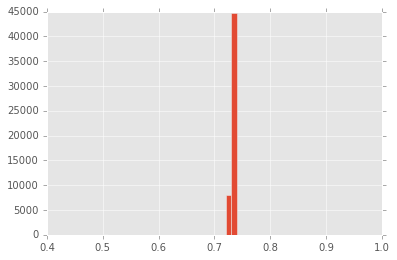

In [900]:
plt.hist(a, bins=np.arange(0.5,1.0,0.01))

In [905]:
loss_and_pluto_and_crime[["Evaluation"] +X_selected].to_csv("model_data.csv")

## Prediction

In [818]:
grocery = pd.read_csv("C:\\Users\\pliu\\Desktop\\starr\\yp_ny_grocery.csv")

In [841]:
grocery_pluto = pd.merge(grocery, pluto_means, left_on="zipcode", right_on="ZipCode", how="inner")

In [842]:
grocery_pluto_crime = pd.merge(grocery_pluto, crime_count, left_on="zipcode", right_on="zipcode",how="inner")

In [843]:
grocery_pluto_crime

,Unnamed: 0,n,business_link,business,adr,address,zipcode,categories_2,website_link,cat,...,AssessTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,IrrLotCode_binary,count
0,1,1.�The Food Emporium,http://www.yellowpages.com/new-york-ny/mip/the...,The Food Emporium,"42 W 39th St # 18New York,�NY�10018",42 W 39th St # 18,10018.0,NaN,http://www.thefoodemporium.com/,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
1,7,7.�Big Market,http://www.yellowpages.com/new-york-ny/mip/big...,Big Market,"555 8th AveNew York,�NY�10018",555 8th Ave,10018.0,NaN,http://bigapplemeatmarket.com/,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
2,8,8.�Group Food Ventures,http://www.yellowpages.com/new-york-ny/mip/gro...,Group Food Ventures,"335 W 39th StNew York,�NY�10018",335 W 39th St,10018.0,Wholesale Grocers,NaN,Grocery StoresWholesale Grocers,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
3,33,33.�Hestia Market PlaceProducts,http://www.yellowpages.com/new-york-ny/mip/hes...,Hestia Market Place,"513 Fashion AveNew York,�NY�10018",513 Fashion Ave,10018.0,NaN,NaN,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
4,194,194.�Pax Wholesome Foods,http://www.yellowpages.com/new-york-ny/mip/pax...,Pax Wholesome Foods,"1350 BroadwayNew York,�NY�10018",1350 Broadway,10018.0,NaN,NaN,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
5,196,196.�Hybrid Capital Markets Inc,http://www.yellowpages.com/new-york-ny/mip/hyb...,Hybrid Capital Markets Inc,"1001 Avenue Of The Americas Fl 2New York,�NY�1...",1001 Avenue Of The Americas Fl 2,10018.0,NaN,NaN,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
6,197,197.�Bao Food Inc,http://www.yellowpages.com/new-york-ny/mip/bao...,Bao Food Inc,"36 W 38th StNew York,�NY�10018",36 W 38th St,10018.0,NaN,NaN,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
7,198,198.�Lucky Food Market,http://www.yellowpages.com/new-york-ny/mip/luc...,Lucky Food Market,"303 W 36th StNew York,�NY�10018",303 W 36th St,10018.0,NaN,NaN,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
8,199,199.�A & P,http://www.yellowpages.com/new-york-ny/mip/a-p...,A & P,"42 W 39th StNew York,�NY�10018",42 W 39th St,10018.0,NaN,http://www.apsupermarket.com/,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59
9,200,200.�C & A Gourmet Inc,http://www.yellowpages.com/new-york-ny/mip/c-a...,C & A Gourmet Inc,"472 9th AveNew York,�NY�10018",472 9th Ave,10018.0,NaN,http://gourmetfoodsinc.com/,Grocery Stores,...,1.026960e+07,1723.244800,858.406400,140.771200,8.074672,4.792032,8.528000,9.772000,0.208000,59


In [852]:
predicted = result.predict(grocery_pluto_crime[['NumFloors','UnitsRes','UnitsTotal','YearBuilt','ResidFAR','FacilFAR','count']].astype(float))

In [847]:
grocery_pluto_crime[['NumFloors','UnitsRes','UnitsTotal','YearBuilt','ResidFAR','FacilFAR','count']]

,NumFloors,UnitsRes,UnitsTotal,YearBuilt,ResidFAR,FacilFAR,count
0,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
1,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
2,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
3,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
4,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
5,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
6,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
7,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
8,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59
9,9.838400,11.454400,29.280000,1723.244800,4.792032,9.772000,59


In [859]:
for x in np.exp([x for x in predicted])/(np.exp([x for x in predicted])+1):
    print x

0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730313173803
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.730635541344
0.73063554

## Foursquare API

In [258]:
import foursquare

In [721]:
client = foursquare.Foursquare(client_id='00RHMIZTAJ2UOTRDUDVFGPSNI4Q3LTXCI2FBUURYWL2QGPU5', \
                               client_secret='VXLG10WIW1TF2S0ZYEB1GCMOQKEUKHFS4YMDLAKIMWGAEVN3', redirect_uri='http://fondu.com/oauth/authorize')

In [441]:
j = client.venues.search(params={'intent': 'browse', 'query':['repair','furniture'],'sw': '33.84,-84.3769', 'ne': '33.8563,-84.355', 'limit': 50}).get('venues')

In [753]:
mylist = []
for i in np.arange(40.57, 40.7 , 0.01):
    for j in np.arange(-73.88, -74, -0.01): 
        venue = client.venues.search(params={'intent': 'browse', 'query': 'grocery',\
                                 'sw': str(i)+","+str(j), 'ne': str(i+0.01)+ ',' + str(j+0.01), 'limit': 50}).get('venues')
        mylist.append(venue)

In [754]:
len(mylist)

182

In [755]:
n=0
for x in mylist:
    if len(x)>0:
        print x
        n+=1
print n

[{u'verified': False, u'name': u'Yireh Deli & Grocery', u'referralId': u'v-1480280363', u'venueChains': [], u'specials': {u'count': 0, u'items': []}, u'allowMenuUrlEdit': True, u'contact': {u'phone': u'7183320986', u'formattedPhone': u'(718) 332-0986'}, u'hasPerk': False, u'location': {u'city': u'Brooklyn', u'labeledLatLngs': [{u'lat': 40.5783266724271, u'lng': -73.95505413408203, u'label': u'display'}], u'cc': u'US', u'country': u'United States', u'postalCode': u'11235', u'state': u'NY', u'formattedAddress': [u'1151 Brighton Beach Ave', u'Brooklyn, NY 11235', u'United States'], u'address': u'1151 Brighton Beach Ave', u'lat': 40.5783266724271, u'lng': -73.95505413408203}, u'beenHere': {u'unconfirmedCount': 0, u'marked': False, u'lastCheckinExpiredAt': 0}, u'stats': {u'tipCount': 1, u'checkinsCount': 51, u'usersCount': 8}, u'id': u'4ea30eefd3e32e68683fdeac', u'categories': [{u'pluralName': u'Delis / Bodegas', u'primary': True, u'name': u'Deli / Bodega', u'shortName': u'Deli / Bodega', u

In [756]:
import csv
for x in mylist:
    if len(x)>0:
        with open("dict.csv", "a") as f:
            w = csv.DictWriter(f, x[0].keys())
            w.writeheader()
            w.writerow(x)

ValueError: dict contains fields not in fieldnames: {u'verified': False, u'name': u'Yireh Deli & Grocery', u'referralId': u'v-1480280363', u'venueChains': [], u'specials': {u'count': 0, u'items': []}, u'allowMenuUrlEdit': True, u'contact': {u'phone': u'7183320986', u'formattedPhone': u'(718) 332-0986'}, u'hasPerk': False, u'location': {u'city': u'Brooklyn', u'labeledLatLngs': [{u'lat': 40.5783266724271, u'lng': -73.95505413408203, u'label': u'display'}], u'cc': u'US', u'country': u'United States', u'postalCode': u'11235', u'state': u'NY', u'formattedAddress': [u'1151 Brighton Beach Ave', u'Brooklyn, NY 11235', u'United States'], u'address': u'1151 Brighton Beach Ave', u'lat': 40.5783266724271, u'lng': -73.95505413408203}, u'beenHere': {u'unconfirmedCount': 0, u'marked': False, u'lastCheckinExpiredAt': 0}, u'stats': {u'tipCount': 1, u'checkinsCount': 51, u'usersCount': 8}, u'id': u'4ea30eefd3e32e68683fdeac', u'categories': [{u'pluralName': u'Delis / Bodegas', u'primary': True, u'name': u'Deli / Bodega', u'shortName': u'Deli / Bodega', u'id': u'4bf58dd8d48988d146941735', u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/food/deli_', u'suffix': u'.png'}}]}, {u'verified': False, u'name': u'Deli & Grocery', u'referralId': u'v-1480280363', u'venueChains': [], u'specials': {u'count': 0, u'items': []}, u'allowMenuUrlEdit': True, u'contact': {}, u'hasPerk': False, u'location': {u'city': u'Brooklyn', u'labeledLatLngs': [{u'lat': 40.57949671957573, u'lng': -73.95768302643113, u'label': u'display'}], u'cc': u'US', u'country': u'United States', u'postalCode': u'11235', u'state': u'NY', u'formattedAddress': [u'105 Brighton 11th St', u'Brooklyn, NY 11235', u'United States'], u'address': u'105 Brighton 11th St', u'lat': 40.57949671957573, u'lng': -73.95768302643113}, u'beenHere': {u'unconfirmedCount': 0, u'marked': False, u'lastCheckinExpiredAt': 0}, u'stats': {u'tipCount': 0, u'checkinsCount': 5, u'usersCount': 2}, u'id': u'51e8659c498ea38feadef5fe', u'categories': [{u'pluralName': u'Convenience Stores', u'primary': True, u'name': u'Convenience Store', u'shortName': u'Convenience Store', u'id': u'4d954b0ea243a5684a65b473', u'icon': {u'prefix': u'https://ss3.4sqi.net/img/categories_v2/shops/conveniencestore_', u'suffix': u'.png'}}]}

In [325]:
#address
j.get('venues')[0].get('location').get('formattedAddress')

[u'714 S Dearborn St Fl 6', u'Chicago, IL 60605', u'United States']

In [327]:
#phone number
j.get('venues')[0].get('contact').get('formattedPhone')

u'(312) 617-6400'